# Analysis: Spotify and Youtube Top Music Songs  
 
Dataset was downloaded from [Kaggle](https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube).
 
### About Dataset 

Dataset of songs of various artist in the world and for each song is present:

- Several statistics of the music version on spotify, including the number of streams;
- Number of views of the official music video of the song on youtube.
 
### Content 

It includes 26 variables for each of the songs collected from spotify. These variables are briefly described next:

- **Track**: name of the song, as visible on the Spotify platform. 

- **Artist**: name of the artist. 

- **Url_spotify**: the Url of the artist. 

- **Album**: the album in wich the song is contained on Spotify. 

- **Album_type**: indicates if the song is relesead on Spotify as a single or contained in an album. 

- **Uri**: a spotify link used to find the song through the API. 

- **Danceability**: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

- **Energy**: is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

- **Key**: the key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. 

- **Loudness**: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db. 

- **Speechiness**: detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 

- **Acousticness**: a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 

- **Instrumentalness**: predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 

- **Liveness**: detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 

- **Valence**: a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 

- **Tempo**: the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- Duration_ms: the duration of the track in milliseconds. 
 
- **Stream**: number of streams of the song on Spotify. 

- **Url_youtube**: url of the video linked to the song on Youtube, if it have any. 

- **Title**: title of the videoclip on youtube. 

- **Channel**: name of the channel that have published the video. 

- **Views**: number of views. 

- **Likes**: number of likes. 

- **Comments**: number of comments. 

- **Description**: description of the video on Youtube. 

- **Licensed**: Indicates whether the video represents licensed content, which means that the content was uploaded to a channel linked to a YouTube content partner and then claimed by that partner. 

- **official_video**: boolean value that indicates if the video found is the official video of the song.

In [107]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

df=pd.read_csv('Spotify_Youtube.csv')
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [108]:
# Remove unused column 
df=df.drop(columns='Unnamed: 0')

In [13]:
df.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


### Let's check missing data with visualization  
The map below shows the missing value pattern for the set features. 
On the horizontal axis are signs and on the vertical are the number of rows. The yellow color is about missing data.

<Axes: >

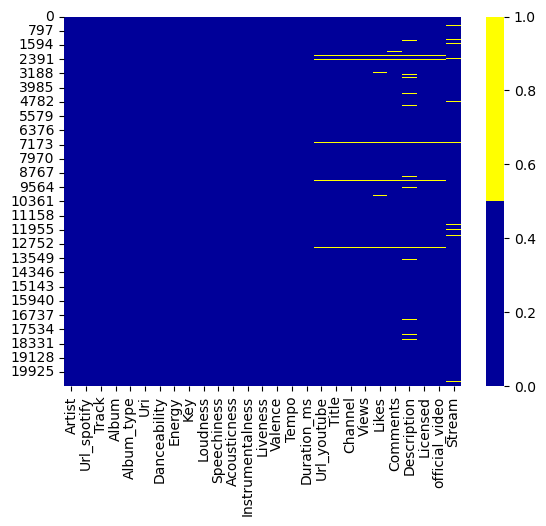

In [110]:
cols = df.columns
colours = ['#000099', '#ffff00'] # define colors: yellow - missing data, blue - not missing
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In general, we have a complete dataset with a small number of missing values. 
Another way to check for empty values is the Percent List of Missing Data.

In [18]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Artist - 0%
Url_spotify - 0%
Track - 0%
Album - 0%
Album_type - 0%
Uri - 0%
Danceability - 0%
Energy - 0%
Key - 0%
Loudness - 0%
Speechiness - 0%
Acousticness - 0%
Instrumentalness - 0%
Liveness - 0%
Valence - 0%
Tempo - 0%
Duration_ms - 0%
Url_youtube - 2%
Title - 2%
Channel - 2%
Views - 2%
Likes - 3%
Comments - 3%
Description - 4%
Licensed - 2%
official_video - 2%
Stream - 3%


In [19]:
df.isna().sum()

Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

It's possible to replace gaps in some of the data with averages or manually check the establishments and fill in the missing information.
But such an analysis will require much more time and resources. In this case, it's better to remove null values.

In [20]:
# Remove null values
df.dropna(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19170 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19170 non-null  object 
 1   Url_spotify       19170 non-null  object 
 2   Track             19170 non-null  object 
 3   Album             19170 non-null  object 
 4   Album_type        19170 non-null  object 
 5   Uri               19170 non-null  object 
 6   Danceability      19170 non-null  float64
 7   Energy            19170 non-null  float64
 8   Key               19170 non-null  float64
 9   Loudness          19170 non-null  float64
 10  Speechiness       19170 non-null  float64
 11  Acousticness      19170 non-null  float64
 12  Instrumentalness  19170 non-null  float64
 13  Liveness          19170 non-null  float64
 14  Valence           19170 non-null  float64
 15  Tempo             19170 non-null  float64
 16  Duration_ms       19170 non-null  float6

In [111]:
#Check duplicates
df.duplicated().sum()

0

### Let's take a look at a basic statistical indicators

In [165]:
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


### Let's see the total number of album types

In [114]:
album_types_count = df['Album_type'].value_counts()
print(album_types_count)

album          14926
single          5004
compilation      788
Name: Album_type, dtype: int64


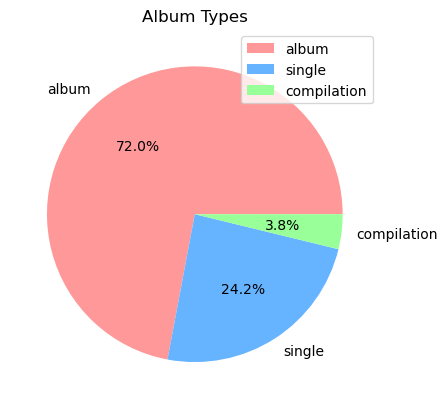

In [254]:
labels = album_types_count.index.tolist()
sizes = album_types_count.values.tolist()
colors = ['#ff9999','#66b3ff','#99ff99']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Album Types')
plt.legend(labels, loc='upper right')

plt.show()

Album type is the most popular. The data shows that the album type has a significantly higher number of views compared to the other types (compilation and single).

### Top 10 Artists on Youtube and Spotify

<Axes: title={'center': 'Top 10 Artists on Spotify'}, xlabel='Artist'>

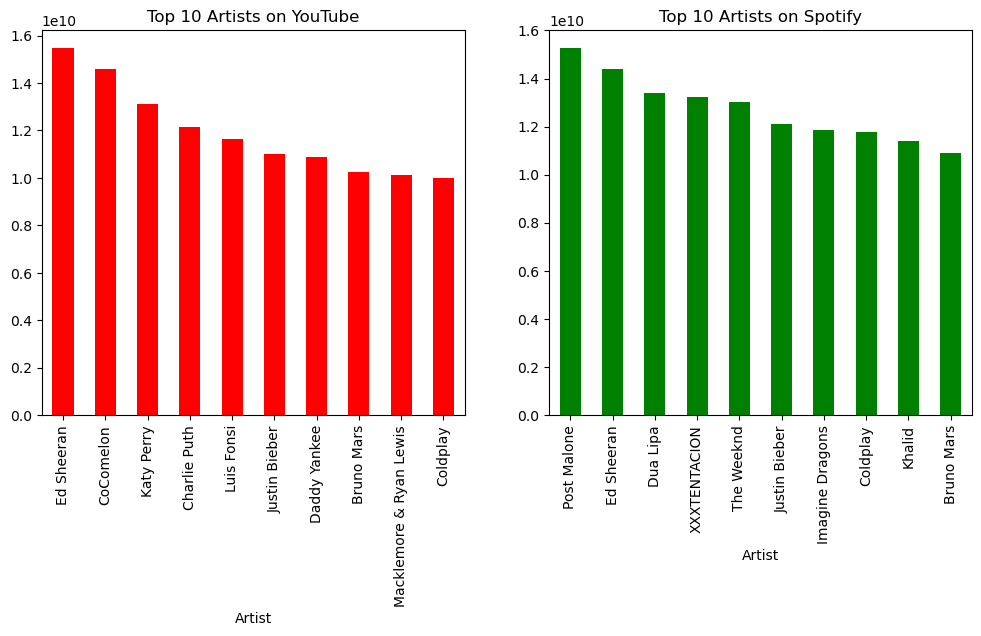

In [218]:
top_artists_youtube=df.groupby('Artist')['Views'].sum().sort_values(ascending=False).head(10) 
top_artists_spotify=df.groupby('Artist')['Stream'].sum().sort_values(ascending=False).head(10) 


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.set_title('Top 10 Artists on YouTube')
top_artists_youtube.plot(kind='bar', ax=ax1, cmap="autumn")

ax2.set_title('Top 10 Artists on Spotify')
top_artists_spotify.plot(kind='bar', ax=ax2, cmap="ocean")


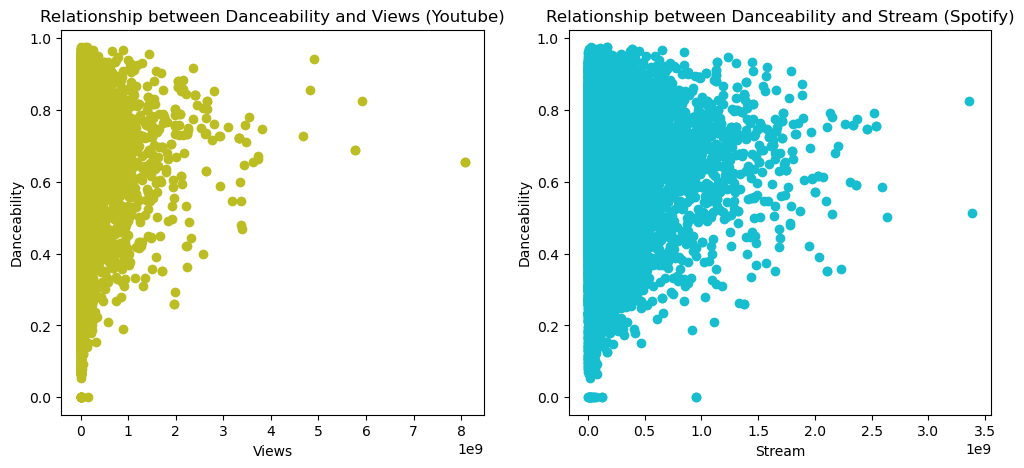

In [273]:
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12,5))

ax3.set_title('Relationship between Danceability and Views (Youtube)')
ax3.set_xlabel('Views')
ax3.set_ylabel('Danceability')
ax3.scatter(df['Views'], df['Danceability'], c='#bcbd22')

ax4.set_title('Relationship between Danceability and Stream (Spotify)')
ax4.set_xlabel('Stream')
ax4.set_ylabel('Danceability')
ax4.scatter(df['Stream'], df['Danceability'], c='#17becf')

There are correlations between Views and Danceability, Stream and Danceability. Obviously, tracks with high danceability are popular and repeated. It is observed on both platforms, Youtube and Spotify.

### Heatmap of Audio Feature Correlation

<Axes: >

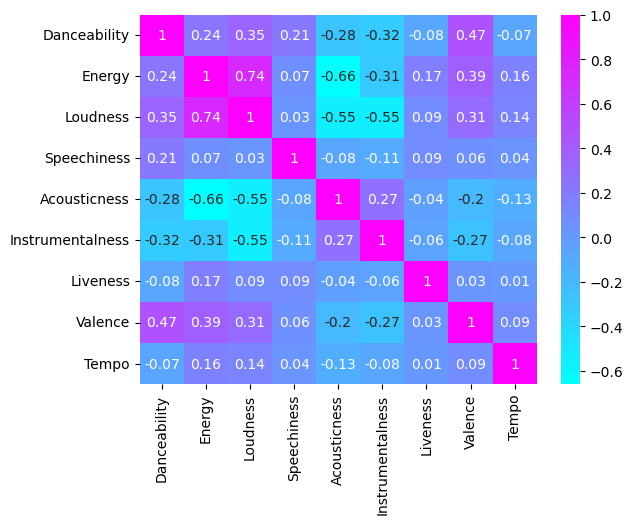

In [150]:
audio_features = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]

# Create a correlation matrix
corr_audio = audio_features.corr().round(2)
sns.heatmap(corr_audio, annot=True, cmap="cool")

There is a strong positive correlation between Energy and Loudness and a low correlation between Energy and Acousticness. More energetic tracks tend to be more loud. This makes sense, as people often listen to music to boost their mood, express their emotions, or have fun. Also we can see a positive correlation between Danceability and Valence. Valence is a feature that describes the musical positivity conveyed by a track. It means that people feel an optimistic vibe when they are dancing.  